In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [79]:
train = pd.read_csv("training_set_values.csv", parse_dates=["date_recorded"])
train_lbls = pd.read_csv("training_set_labels.csv")
test = pd.read_csv("test_set_values.csv", parse_dates=["date_recorded"])

In [80]:
train["status_group"] = train_lbls.status_group

In [81]:
train.shape

(59400, 41)

In [82]:
train.to_csv("train.csv")

In [83]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [84]:
train.iloc[8729]

id                                         20198
amount_tsh                                   0.0
date_recorded                2004-05-01 00:00:00
funder                    Government Of Tanzania
gps_height                                    86
installer                                    DWE
longitude                              38.959776
latitude                               -5.247278
wpt_name                            Kwa Bi Shoga
num_private                                    0
basin                                    Pangani
subvillage                         Mapojoni Kati
region                                     Tanga
region_code                                    4
district_code                                  4
lga                                       Muheza
ward                                     Ngomeni
population                                   120
public_meeting                              True
recorded_by              GeoData Consultants Ltd
scheme_management   

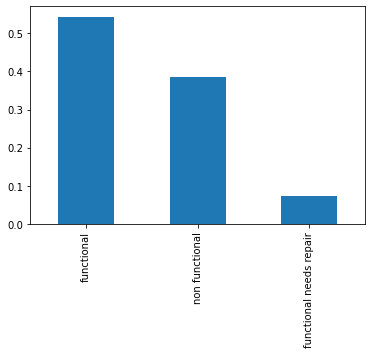

In [85]:
train.status_group.value_counts(normalize=True).plot(kind = "bar")
plt.show()

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [87]:
train.isna().sum().sort_values(ascending=False)[:7]

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
dtype: int64

In [88]:
(train.construction_year == 0).sum()

20709

In [89]:
## when construction year == 0 let´s set it to date_recorded.year
train.loc[train.construction_year == 0, "construction_year"] = train.date_recorded.dt.year
## we also have construction years LATER than date_recorded which results in negative age! We assume they are NEW!
train.loc[train.construction_year > train.date_recorded.dt.year, "construction_year"] = train.date_recorded.dt.year

In [90]:
# age at time of recording
train["age"] = train.date_recorded.dt.year - train.construction_year